In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


matplotlib.image : 이미지를 볼때 주로 사용

In [0]:
import tensorflow as tf
import numpy as np
import os

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


저장된 그래프(pb파일)를 생성

In [0]:
def create_graph(modelFullPath) :
  with tf.gfile.FastGFile(modelFullPath, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _=tf.import_graph_def(graph_def, name='')

저장된 모델 파일 경로, 테스트할 이미지 경로 지정

In [0]:
modelFullPath = '/content/drive/My Drive/inception-v3/tmp/output_graph.pb'

img_path = '/content/drive/My Drive/inception-v3/'
img_name = 'cat_test.jpeg'

이미지 호출

In [0]:
image_data = tf.gfile.FastGFile(img_path + img_name, 'rb').read()
print(image_data)

W0725 08:46:06.910073 140676004599680 deprecation.py:323] From <ipython-input-5-04dc7389d746>:1: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x12\x10\x12\x15\x0f\x10\x10\x0f\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x15\x16\x16\x15\x15\x15\x15\x18\x1d( \x18\x1a%\x1b\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x15\x10\x0f\x17-\x1d\x15\x1d---------+--------+------++-----+---+-------77++--\xff\xc0\x00\x11\x08\x00\xc2\x01\x03\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x03\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x007\x10\x00\x02\x02\x00\x04\x03\x06\x04\x04\x06\x02\x03\x00\x00\x00\x00\x00\x01\x02\x11\x03\x04\x12!1AQ\x05"aq\x91\xa1\x132\x81\xf0\x06\xb1\xc1\xd1\x14$BRb\xe1#\xf1\x15\x82\x92\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x02\x04\xff\xc4\x00 \x11\x01\x01\x00\x02\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11!1\x12A\x03\x13a"Q\xff\xda\x00\x0c\x03\x01\x

그래프 생성

In [0]:
create_graph(modelFullPath)

생성된 그래프에서 마지막 노드(softmax_tensor), 입력 노드(input node)를 불러와 예측

In [0]:
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    predictions = sess.run(softmax_tensor, feed_dict={'DecodeJpeg/contents:0': image_data})
    print(predictions)
    predictions = np.squeeze(predictions)
  
    argmax = sess.run(tf.argmax(predictions))
    cat_predictions = predictions[0]
    dog_predictions = predictions[1]
print('predictions : %.4f, %.4f' % (cat_predictions, dog_predictions))

KeyError: ignored

predict :  0


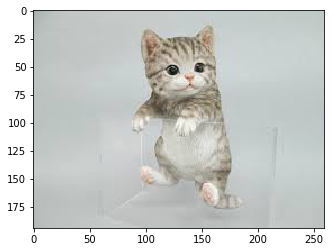

In [0]:
print('predict : ', argmax)
img = mpimg.imread(img_path + img_name)
imgplot = plt.imshow(img)
plt.show()